In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
gamintojas
ekrano įstrižainė
operacinė sistema
vidinė atmintis (gb)
atmintis (ram) (gb)
ypatybės
atminties kortelė
spalva
modelio pavadinimas
modelis
procesoriaus modelis
procesoriaus dažnis
ekrano dydis
ekrano raiška
gylis
įmontuotas mikrofonas
plotis
pridedama klaviatūra
infraraudonųjų spindulių prievadas
aukščio
bluetooth
sim kortelės palaikymas
operatyvioji atmintis
ekrano tipas
skambinimo parinktis
usb
gps navigacija
priekinė kamera
pc002 procesorius
korpuso medžiaga
akumuliatoriaus talpa
hdmi
matmenys
pc006 vaizdo įrašas
branduolių skaičius
svorio
disko atmintis
bevielis internetas
planšetinio kompiuterio tipas
serija
pirštų atspaudų skaitytuvas
nfc
ausinių prijungimas
mobiliojo ryšio duomenys
operatyvioji ram atmintis
svoris
integruoti jutikliai
papildomi priedai
pagrindinė kamera
vidinės atminties dydis
atminties kortelių skaitytuvas
įkrovimas iš usb jungties
procesoriaus šeima
vidinė atmintis
sim kortelė
aukštis
įdiegta ram atmintis
cpu dažn

In [12]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df.head()

,kaina,gamintojas
0,219,Lenovo
1,119,Lenovo
2,177,Lenovo
3,122,Lenovo
4,389,Samsung


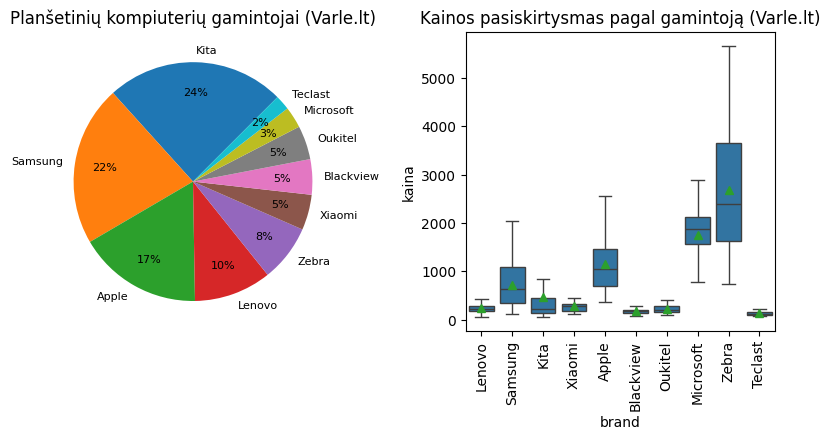

In [13]:
top = df['gamintojas'].value_counts().head(9).index.tolist()

df['brand'] = df['gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax1.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax1.set_title('Planšetinių kompiuterių gamintojai (Varle.lt)')
sns.boxplot(data=df, x='brand', y='kaina', ax=ax2, showmeans=True, showfliers=False)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Kainos pasiskirtysmas pagal gamintoją (Varle.lt)')
plt.tight_layout()
plt.show()

In [45]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

In [15]:
c = df['gamintojas'].value_counts()
c

gamintojas
Samsung      195
Apple        151
Lenovo        94
Zebra         69
Blackview     43
            ... 
HP             1
Acer           1
Elo            1
NORDIC         1
Renewda        1
Name: count, Length: 62, dtype: int64

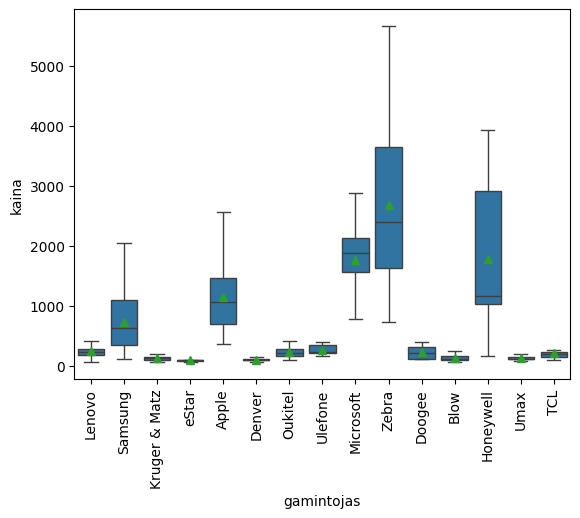

In [ ]:
brand_counts = df['gamintojas'].value_counts()
brands_to_plot = brand_counts[brand_counts > 5].index

df_gamintojas = df[df['gamintojas'].isin(brands_to_plot)][['kaina', 'gamintojas']]
# Calculate the average price per brand
average_price_per_brand = df_gamintojas.groupby('gamintojas')['kaina'].mean().reset_index()
avg_price_sorted = average_price_per_brand.sort_values(by='kaina', ascending=True)
top5_low = avg_price_sorted['gamintojas'].head(5).tolist()
avg_price_sorted = average_price_per_brand.sort_values(by='kaina', ascending=False)
top5_high = avg_price_sorted['gamintojas'].head(5).tolist()
# print(top5_high)
# print(top5_low)
# # Find the median of the average prices
median_avg_price = average_price_per_brand['kaina'].median()
# print(median_avg_price)

# Find the 5 brands whose average prices are closest to the median
average_price_per_brand['price_diff_from_median'] = (average_price_per_brand['kaina'] - median_avg_price).abs()
top_5_middle_avg = average_price_per_brand.sort_values(by='price_diff_from_median').head(5)
top5_middle = top_5_middle_avg['gamintojas'].head(5).tolist()
# print(top5_middle)
top_brands = top5_high + top5_middle + top5_low
# print(top_brands)




df_brand = df_gamintojas[df_gamintojas['gamintojas'].isin(top_brands)]
df_brand.head()
sns.boxplot(data=df_brand, x='gamintojas', y='kaina', showmeans=True, showfliers=False)
plt.tick_params(axis='x', rotation=90)
plt.title('Top gamintojai kainos pasiskirstymas (Varle.lt)')
plt.show()


In [116]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`ekrano įstrižainė`,
`ekrano dydis`,
`ekrano dydis (coliais)`,
`ekranas – įstrižainė (")`,
`įstrižainės ekranas`,
`ekrano dydis [coliais]`
from PlanseteVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df.head()

,kaina,ekrano įstrižainė,ekrano dydis,ekrano dydis (coliais),"ekranas – įstrižainė ("")",įstrižainės ekranas,ekrano dydis [coliais]
0,219.0,11.0,None,None,None,None,None
1,119.0,10.1,None,None,None,None,None
2,177.0,"11"" - 11,9","11""",None,None,None,None
3,122.0,9.0,None,None,None,None,None
4,389.0,"10"" - 10,9","10,9""",None,None,None,None


In [117]:
for col in df.columns:
    if col != 'kaina':
        df['ekrano įstrižainė'] = df['ekrano įstrižainė'].fillna(df[col])

df.dropna(subset='ekrano įstrižainė', inplace=True)

def set_size(x):
    if 'cm' in x:
        size_cm = float(x.split(' ')[0].replace(',', '.'))
        coliai = round(size_cm /2.54, 1)
        return coliai
    else:
        return x
    
df['ekrano įstrižainė'] = df['ekrano įstrižainė'].apply(set_size)

df['ekrano įstrižainė'] = df['ekrano įstrižainė'].str.extract('(\d+)')
df['ekrano įstrižainė'] = df['ekrano įstrižainė'].apply(lambda x: float(x))
dfe = df[['kaina','ekrano įstrižainė' ]]
dfe_gr = dfe.groupby('ekrano įstrižainė').mean(numeric_only=True).reset_index()

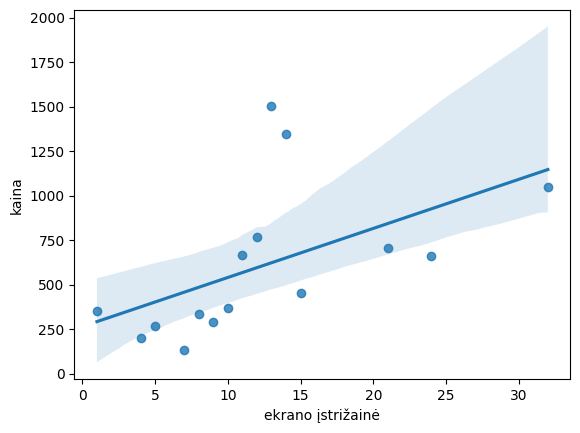

In [ ]:
fig, ax = plt.subplots()
sns.regplot(data=dfe_gr[dfe_gr['ekrano įstrižainė'] < 40], x='ekrano įstrižainė', y='kaina')
plt.title('Kainos priklausomybė nuo ekrano įstižainės')
plt.show()